# Generate 5M sample from 400k individual data file

## Imports

In [1]:
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt
from Functions import *
%matplotlib inline

## User input

In [2]:
START_TIME = time.time()

## Read input files

#### Census file

In [3]:
dfC2011OldData = pd.read_excel("C2011_old_data_.xlsx", engine = 'openpyxl')

#### Nursing homes file

In [4]:
nursingHomesFile = 'NewWorldResidences.csv'
dfResidencias = pd.read_csv(nursingHomesFile, index_col=0)

## Preprocessing

### Census file

In [5]:
numPeople400k = len(dfC2011OldData)

print('Cens file contains ', numPeople400k, 'people')

Cens file contains  408644 people


#### Sort data by regions in alphabetic order

In [6]:
dfC2011OldData = dfC2011OldData.sort_values('Muni_rec')

#### Get list of unique cities

In [7]:
muniList = dfC2011OldData['Muni_rec'].unique()

nMunis = len(muniList)
print('The', nMunis, 'muni recs are:\n') 
print(muniList)

The 33 muni recs are:

['ALTP30_40' 'ALTP>40' 'ANOIA30_40' 'ANOIA>40' 'BAG30_40' 'BAG>40'
 'BAIXLL10_15' 'BAIXLL15_20' 'BAIXLL20_25' 'BAIXLL<10' 'BAIXLL_ALTP_25_30'
 'BCN' 'BCNES <10' 'BER>65' 'GAR30_40' 'GAR>40' 'MAR10_15' 'MAR15_20'
 'MAR20_25' 'MAR25_30' 'MAR30_40' 'MAR>40' 'OSO>40' 'VAOCC10_15'
 'VAOCC15_20' 'VAOCC20_25' 'VAOCC25_30' 'VAOCC_OR30_40' 'VAOR10_15'
 'VAOR15_20' 'VAOR20_25' 'VAOR25_30' 'VAOR>40']


#### Get regions list from muni_rec plus BCN neighbourhoods (skip this cell if you want to use code33 regions from census only)

In [8]:
muniRec400k = dfC2011OldData['Muni_rec'].to_numpy()
region400k = np.copy(muniRec400k) 

neigBCN400k = dfC2011OldData['BARRIO_BCN'].to_numpy()
neigBCN400k[neigBCN400k == 'Verdun, la Propsperitat'] = 'Verdun, la Prosperitat'  # Correct name

neigBCN400k = 'BCN_'+neigBCN400k
maskBCN = (muniRec400k == 'BCN') 
region400k[maskBCN] = neigBCN400k[maskBCN] 

#### Create 400k peopple arrays from inut file

In [9]:
homeID400k = dfC2011OldData['IDHUECO'].to_numpy()
age400k = dfC2011OldData['EDAD'].to_numpy()
gender400k = dfC2011OldData['SEXO'].to_numpy()
factor400k = round(dfC2011OldData['FACTOR']).to_numpy(dtype=int)
jobStatus400k = dfC2011OldData['RELA'].to_numpy(dtype=int, na_value=-1)
jobLocation400k = dfC2011OldData['LTRABA'].to_numpy(dtype=int, na_value=-1)
timeToWork400k = dfC2011OldData['TDESP'].to_numpy(dtype=int, na_value=-1)
homeOccupancy400k = dfC2011OldData['NNIEM'].to_numpy(dtype=int, na_value=-1)

print('Home ID:', homeID400k)
print('Age:', age400k)
print('Gender:', gender400k)
print('Factor:', factor400k)
print('Job status:', jobStatus400k)
print('Job location:', jobLocation400k)
print('Time to work:', timeToWork400k)
print('Home occupancy:', homeOccupancy400k)

Home ID: [ 896554 1297315 1297315 ...  325963 1361662 1488095]
Age: [ 5  6 35 ... 52 31 30]
Gender: [6 6 6 ... 1 1 1]
Factor: [5 6 6 ... 6 3 8]
Job status: [-1 -1  2 ...  1  1  2]
Job location: [ 3  3 -1 ...  1  4 -1]
Time to work: [ 2  1 -1 ... -1  2 -1]
Home occupancy: [4 4 4 ... 6 3 4]


#### Create 5M people world from previous arrays (using factor400k)

In [10]:
numPeople5M = int(factor400k.sum())
print('Full world will have', numPeople5M, 'people')

homeID5M         = np.empty(numPeople5M, dtype=int)
age5M            = np.empty(numPeople5M, dtype=int)
gender5M         = np.empty(numPeople5M, dtype=int)
region5M         = np.empty(numPeople5M, dtype=object) 
jobStatus5M      = np.empty(numPeople5M, dtype=int)
jobLocation5M    = np.empty(numPeople5M, dtype=int)
timeToWork5M     = np.empty(numPeople5M, dtype=int)
homeOccupancy5M  = np.empty(numPeople5M, dtype=int)

iCounter = 0
for iPeople in range(numPeople400k):    
    for iFactor in range(factor400k[iPeople]):
        
        homeID5M[iCounter]         = homeID400k[iPeople] * 1000 + iFactor
        age5M[iCounter]            = age400k[iPeople]
        gender5M[iCounter]         = gender400k[iPeople]
        region5M[iCounter]         = region400k[iPeople]        
        jobStatus5M[iCounter]      = jobStatus400k[iPeople]        
        jobLocation5M[iCounter]    = jobLocation400k[iPeople]        
        timeToWork5M[iCounter]     = timeToWork400k[iPeople]        
        homeOccupancy5M[iCounter]  = homeOccupancy400k[iPeople]        
       
        iCounter += 1 
    
# Create and fill the dataframe    
data = {'HomeID': homeID5M, \
        'Age': age5M, \
        'Gender': gender5M, \
        'HomeRegion': region5M, \
        'JobStatus': jobStatus5M, \
        'JobLocation': jobLocation5M, \
        'TimeToWork': timeToWork5M, \
        'HomeOccupancy': homeOccupancy5M }

        
dfWorld5M = pd.DataFrame(data)
dfWorld5M = dfWorld5M.sort_values(by=['HomeRegion'], ignore_index = True)

Full world will have 5487860 people


#### Recreate arrays

In [11]:
homeID5M = dfWorld5M['HomeID'].to_numpy()
age5M = dfWorld5M['Age'].to_numpy()
region5M = dfWorld5M['HomeRegion'].to_numpy()
gender5M = dfWorld5M['Gender'].to_numpy()
jobStatus5M = dfWorld5M['JobStatus'].to_numpy()
jobLocation5M = dfWorld5M['JobLocation'].to_numpy()

timeToWork5M = dfWorld5M['TimeToWork'].to_numpy()

homeOccupancy5M = dfWorld5M['HomeOccupancy'].to_numpy()

print('Home ID:', homeID5M)
print('Age:', age5M)
print('Home region:', region5M)
print('Gender:', gender5M)
print('Job status:', jobStatus5M)
print('Job location:', jobLocation5M)
print('Time to work:', timeToWork5M)
print('Home occupancy:', homeOccupancy5M)

Home ID: [ 896554000 1141519015 1141519016 ...  559287012 1168044014 1488095007]
Age: [ 5 51 51 ... 33  4 30]
Home region: ['ALTP30_40' 'ALTP30_40' 'ALTP30_40' ... 'VAOR>40' 'VAOR>40' 'VAOR>40']
Gender: [6 6 6 ... 1 1 1]
Job status: [-1  1  1 ...  1 -1  2]
Job location: [ 3  3  3 ...  4  4 -1]
Time to work: [ 2  3  3 ...  2  1 -1]
Home occupancy: [4 3 3 ... 2 3 4]


#### Create list of regions

In [12]:
regionsList = dfWorld5M['HomeRegion'].unique()
nRegions = len(regionsList)
print('There are', nRegions, 'regions:\n')

peoplePerRegion = dfWorld5M['HomeRegion'].value_counts()[regionsList]
print(peoplePerRegion)

There are 83 regions:

ALTP30_40      72309
ALTP>40        25692
ANOIA30_40     29429
ANOIA>40       88592
BAG30_40       22174
               ...  
VAOR10_15      21748
VAOR15_20     103441
VAOR20_25      25945
VAOR25_30     109488
VAOR>40        41054
Name: HomeRegion, Length: 83, dtype: int64


#### Worker's world

##### Count workers

In [13]:
filterWork = dfWorld5M['JobStatus'] == 1
workersRegion5M = dfWorld5M['HomeRegion'].where(filterWork).value_counts()[regionsList]
print('The working crew are', workersRegion5M.sum(), 'people')
noworkers = len(dfWorld5M) - workersRegion5M.sum()
print('People that not work are', noworkers)
print('% of workers is {:.2f}'.format(workersRegion5M.sum()/len(dfWorld5M)))

The working crew are 2247353 people
People that not work are 3240507
% of workers is 0.41


##### Create BCN neighborhoods and 'Comarques' lists

In [14]:
BCNneighborList = dfC2011OldData['BARRIO_BCN'].unique()
BCNneighborList = BCNneighborList[BCNneighborList != 'Prov BCN']
BCNneighborList = 'BCN_'+ BCNneighborList
BCNneighborList = np.sort(BCNneighborList)
nBCNneighbor = len(BCNneighborList)
print('The', nBCNneighbor, 'BCN neighborhoods are: \n')
print(BCNneighborList)

The 51 BCN neighborhoods are: 

['BCN_Canyelles, les Roquetes'
 'BCN_Diagonal i el Front Marítim del Poblenou, Provençals de Poblenou'
 'BCN_Hostafrancs, la Bordeta' 'BCN_Les Corts' 'BCN_Porta'
 'BCN_Sant Andreu (Est)' 'BCN_Sant Andreu (Oest)' 'BCN_Sant Antoni'
 'BCN_Sant Gervasi-Galvany' 'BCN_Sant Martí de Provençals'
 'BCN_Sant Pere, Santa Caterina i la Ribera' 'BCN_Sants'
 'BCN_Sants - Badal' 'BCN_Vallcarca i els Penitents, el Coll, la Salut'
 'BCN_Vallvidrera, el Tibidabo i les Planes, Sarrià'
 'BCN_Verdun, la Prosperitat' 'BCN_Vilapicina i la Torre Llobeta'
 'BCN_el Baix Guinardó, Can Baró' 'BCN_el Barri Gòtic'
 'BCN_el Besòs i el Maresme' "BCN_el Camp d'en Grassot i Gràcia Nova"
 "BCN_el Camp de l'Arpa del Clot" 'BCN_el Carmel' 'BCN_el Clot'
 'BCN_el Congrés i els Indians, Navas' 'BCN_el Fort Pienc'
 'BCN_el Guinardó'
 'BCN_el Parc i la Llacuna del Poblenou, la Vila Olímpica del Poblenou'
 'BCN_el Poble Sec' 'BCN_el Poblenou' 'BCN_el Putxet i el Farró'
 'BCN_el Raval (Nord)' 'BCN

In [15]:
comarquesList = muniList[muniList != 'BCN']
print('The', len(comarquesList), 'comarques are: \n')
print(comarquesList)

The 32 comarques are: 

['ALTP30_40' 'ALTP>40' 'ANOIA30_40' 'ANOIA>40' 'BAG30_40' 'BAG>40'
 'BAIXLL10_15' 'BAIXLL15_20' 'BAIXLL20_25' 'BAIXLL<10' 'BAIXLL_ALTP_25_30'
 'BCNES <10' 'BER>65' 'GAR30_40' 'GAR>40' 'MAR10_15' 'MAR15_20' 'MAR20_25'
 'MAR25_30' 'MAR30_40' 'MAR>40' 'OSO>40' 'VAOCC10_15' 'VAOCC15_20'
 'VAOCC20_25' 'VAOCC25_30' 'VAOCC_OR30_40' 'VAOR10_15' 'VAOR15_20'
 'VAOR20_25' 'VAOR25_30' 'VAOR>40']


##### Create Barcelona city mask / 'Comarques' mask

In [16]:
BCNmask = np.isin(region5M, BCNneighborList)
comarquesMask = ~BCNmask

##### Create job location masks

In [17]:
workAtHomeMask  = ((filterWork) & (dfWorld5M['JobLocation'] == 1)).to_numpy()
workSeveralMask = ((filterWork) & (dfWorld5M['JobLocation'] == 2)).to_numpy()
workOwnMask     = ((filterWork) & (dfWorld5M['JobLocation'] == 3)).to_numpy()
workAnotherMask = ((filterWork) & (dfWorld5M['JobLocation'] == 4)).to_numpy()
workAbroadMask  = ((filterWork) & (dfWorld5M['JobLocation'] == 5)).to_numpy()

##### Create time to work mask

In [18]:
timeToWork20minMask     = ( (filterWork) & \
                            ((dfWorld5M['TimeToWork'] == 1) | (dfWorld5M['TimeToWork'] == 2)) ).to_numpy()
timeToWork20to45minMask = ( (filterWork) & \
                            ((dfWorld5M['TimeToWork'] == 3) | (dfWorld5M['TimeToWork'] == 4)) ).to_numpy()
timeToWork45minMask     = ( (filterWork) & (dfWorld5M['TimeToWork'] >= 5) ).to_numpy()
timeToWorkUnknownMask   = ( (filterWork) & (dfWorld5M['TimeToWork'] == -1) ).to_numpy()

##### Create array with working regions for all the population (use sendOutside function to send workers to workplace (function from *Functions.py*))

In [19]:
workRegion5M = np.full((numPeople5M), 'Nowhere', dtype = object)

######
###### People working at home do so in their home region ######
######
workRegion5M[workAtHomeMask] = region5M[workAtHomeMask] 


######
###### People working in several municipalities ######
######
#      In Barcelona: work in comarques
nToComarques = (workSeveralMask & BCNmask).sum() 
print('seed = ', nToComarques)
np.random.seed(seed = nToComarques)
workRegion5M[workSeveralMask & BCNmask] = np.random.choice(comarquesList, nToComarques)

#      In comarques: work in own region if time to work less than 45'
workRegion5M[workSeveralMask & comarquesMask & ~timeToWork45minMask] = \
    region5M[workSeveralMask & comarquesMask & ~timeToWork45minMask] 

#workRegion5M[workSeveralMask & comarquesMask & timeToWork45minMask] = 'No one takes more than 45''


######ad
###### People working in own municipality ###### 
######
#      In Barcelona: work in own region (barri) if time to work less than 20'or unknown
workRegion5M[workOwnMask & BCNmask & timeToWorkUnknownMask] = \
    region5M[workOwnMask & BCNmask & timeToWorkUnknownMask]

workRegion5M[workOwnMask & BCNmask & timeToWork20minMask] = \
    region5M[workOwnMask & BCNmask & timeToWork20minMask]

#      In Barcelona: work in Barcelonès (but not own region (barri)) if time to work larger than 20'
nInsideBCN = (workOwnMask & BCNmask & ~timeToWork20minMask).sum()
np.random.seed(seed = nInsideBCN)
workRegion5M[workOwnMask & BCNmask & ~timeToWork20minMask] = np.random.choice(BCNneighborList, nInsideBCN)

#      In comarques: work in own region:
workRegion5M[workOwnMask & comarquesMask] = region5M[workOwnMask & comarquesMask] 


######
###### People working in another municipality ######
######
#      In Barcelona: work in comarques
nToComarques = (workAnotherMask & BCNmask).sum()
np.random.seed(seed = nToComarques)
workRegion5M[workAnotherMask & BCNmask] = np.random.choice(comarquesList, nToComarques)

#      In comarques: work in own region if time to work less than 45' and in another otherwise
workRegion5M[workAnotherMask & comarquesMask & ~timeToWork45minMask] = \
    region5M[workAnotherMask & comarquesMask & ~timeToWork45minMask] 

workRegion5M[workAnotherMask & comarquesMask & timeToWork45minMask] = sendOutside(regionsList, region5M, workRegion5M, workAnotherMask & comarquesMask & timeToWork45minMask)

######
###### People working abroad do so in another region ######
######
workRegion5M[workAbroadMask] = sendOutside(regionsList, region5M, workRegion5M, workAbroadMask)

dfWorld5M['WorkRegion'] = workRegion5M

seed =  42032
175293 go to work / school outside own region
2105 wrongly assigned outside regions will be fixed
7278 go to work / school outside own region
88 wrongly assigned outside regions will be fixed


##### Count how many workers and job positions are per region

In [20]:
occurrences = np.count_nonzero(workRegion5M == 'Nowhere')
print(occurrences, 'people do not work\n')

jobPositions = np.zeros(nRegions, dtype = int)

for iRegion, region in enumerate(regionsList):  
    jobPositions[iRegion] = np.count_nonzero(workRegion5M == region)  
    print('In', region, 'live', peoplePerRegion[iRegion], 'of which', workersRegion5M[iRegion],'work, and there are', \
            jobPositions[iRegion], 'job positions')

print('\n The number of job positions is', jobPositions.sum())

3240507 people do not work

In ALTP30_40 live 72309 of which 30787 work, and there are 35427 job positions
In ALTP>40 live 25692 of which 10336 work, and there are 16871 job positions
In ANOIA30_40 live 29429 of which 12097 work, and there are 17873 job positions
In ANOIA>40 live 88592 of which 33398 work, and there are 37940 job positions
In BAG30_40 live 22174 of which 8716 work, and there are 15023 job positions
In BAG>40 live 161985 of which 63474 work, and there are 66702 job positions
In BAIXLL10_15 live 253968 of which 104334 work, and there are 101366 job positions
In BAIXLL15_20 live 118991 of which 51005 work, and there are 52996 job positions
In BAIXLL20_25 live 111045 of which 49020 work, and there are 50099 job positions
In BAIXLL<10 live 242777 of which 97680 work, and there are 96123 job positions
In BAIXLL_ALTP_25_30 live 74370 of which 31044 work, and there are 35659 job positions
In BCNES <10 live 627672 of which 237535 work, and there are 212842 job positions
In BCN_

##### Assign workers to work places

In [21]:
averageSize = np.ones(nRegions) * 10

companyID = np.zeros(numPeople5M, dtype = int)

iCompany = 1 

for iRegion, region in enumerate(regionsList):

    # Get IDs of workers of a region and randomize them
    # jobsID = dfWorld5M.where(dfWorld5M['WorkRegion'] == region).dropna().index.to_numpy(dtype = int)
    jobsID = dfWorld5M.WorkRegion == region
    jobsID = np.where(jobsID)[0]
    random.seed(iRegion * 5)
    random.shuffle(jobsID)

    # Generate size of work places according to Poisson distribution
    np.random.seed(seed = iRegion * 10)
    jobSize = np.random.poisson(averageSize[iRegion], 100000)    # Generate 1arge (100000) array of company sizes     
    cumJobs = np.cumsum(jobSize)                                 # Accumulate sizes
    trunc = np.argmax(cumJobs > len(jobsID))                     # Get the array position with more jobs than needed

    jobSizeTrunc =  jobSize[:trunc - 1]
    jobSizeTrunc = np.append(jobSizeTrunc, len(jobsID) - sum(jobSizeTrunc))  # Exact array of company sizes needed

    companyID[jobsID] =  np.repeat(np.arange(iCompany, iCompany + len(jobSizeTrunc)), jobSizeTrunc)
    iCompany = iCompany + len(jobSizeTrunc)
    print(region, iCompany)

dfWorld5M['companyID'] = companyID    


ALTP30_40 3545
ALTP>40 5242
ANOIA30_40 7039
ANOIA>40 10854
BAG30_40 12357
BAG>40 18998
BAIXLL10_15 29141
BAIXLL15_20 34444
BAIXLL20_25 39467
BAIXLL<10 49104
BAIXLL_ALTP_25_30 52706
BCNES <10 73988
BCN_Canyelles, les Roquetes 74931
BCN_Diagonal i el Front Marítim del Poblenou, Provençals de Poblenou 76136
BCN_Hostafrancs, la Bordeta 77345
BCN_Les Corts 78885
BCN_Porta 79901
BCN_Sant Andreu (Est) 80913
BCN_Sant Andreu (Oest) 82079
BCN_Sant Antoni 83463
BCN_Sant Gervasi-Galvany 85141
BCN_Sant Martí de Provençals 86175
BCN_Sant Pere, Santa Caterina i la Ribera 87311
BCN_Sants 88688
BCN_Sants - Badal 89750
BCN_Vallcarca i els Penitents, el Coll, la Salut 91057
BCN_Vallvidrera, el Tibidabo i les Planes, Sarrià 92341
BCN_Verdun, la Prosperitat 93440
BCN_Vilapicina i la Torre Llobeta 94443
BCN_el Baix Guinardó, Can Baró 95713
BCN_el Barri Gòtic 96877
BCN_el Besòs i el Maresme 97803
BCN_el Camp d'en Grassot i Gràcia Nova 99133
BCN_el Camp de l'Arpa del Clot 100370
BCN_el Carmel 101443
BCN_el Cl

#### Schools' world

##### Count students and see how many attend school in own region and other regions

In [22]:
filterSchool = (dfWorld5M['Age'] <= 18) & (dfWorld5M['JobStatus'] != 1) & (dfWorld5M['JobLocation'] != 1)
schoolersRegion5M = dfWorld5M['HomeRegion'].where(filterSchool).value_counts()[regionsList]
print('The schoolers crew is', schoolersRegion5M.sum(), 'kids')

The schoolers crew is 953019 kids


###### Create school in same region and other region masks

In [23]:
schoolRegion5M = np.full((numPeople5M), 'Nowhere', dtype = object)

schoolInRegionMask  = filterSchool & (dfWorld5M['TimeToWork'] <= 3)

print(schoolInRegionMask.sum(), 'kids study in own region')

schoolRegion5M[schoolInRegionMask] = region5M[schoolInRegionMask]

schoolOutRegionMask  = filterSchool & (dfWorld5M['TimeToWork'] > 3)

schoolRegion5M[schoolOutRegionMask] = sendOutside(regionsList, region5M, schoolRegion5M, schoolOutRegionMask)

dfWorld5M['SchoolRegion'] = schoolRegion5M

899044 kids study in own region
53975 go to work / school outside own region
621 wrongly assigned outside regions will be fixed


##### Count students and school places per region

In [24]:
occurrences = np.count_nonzero(schoolRegion5M == 'Nowhere')
print(occurrences, 'people do not go to school\n')

schoolPlaces = np.zeros(nRegions, dtype = int)

for iRegion, region in enumerate(regionsList):  
    schoolPlaces[iRegion] = np.count_nonzero(schoolRegion5M == region)  
    print('In', region, 'live', peoplePerRegion[iRegion], 'of which', schoolersRegion5M[iRegion],'go to school, and there are', \
            schoolPlaces[iRegion], 'school places')

print('\n The number of scholars is',schoolersRegion5M.sum(), 'and the number of school places', schoolPlaces.sum())

4534841 people do not go to school

In ALTP30_40 live 72309 of which 13654 go to school, and there are 13692 school places
In ALTP>40 live 25692 of which 4895 go to school, and there are 5176 school places
In ANOIA30_40 live 29429 of which 6250 go to school, and there are 6515 school places
In ANOIA>40 live 88592 of which 16795 go to school, and there are 16752 school places
In BAG30_40 live 22174 of which 4058 go to school, and there are 4447 school places
In BAG>40 live 161985 of which 28246 go to school, and there are 28082 school places
In BAIXLL10_15 live 253968 of which 48292 go to school, and there are 46686 school places
In BAIXLL15_20 live 118991 of which 23705 go to school, and there are 22438 school places
In BAIXLL20_25 live 111045 of which 22264 go to school, and there are 21146 school places
In BAIXLL<10 live 242777 of which 42235 go to school, and there are 41017 school places
In BAIXLL_ALTP_25_30 live 74370 of which 15207 go to school, and there are 14851 school places


##### Assign kids to school

In [25]:
# Classrooms' size depends on age
size0 =     7  
size1 =    12   
size2 =    16
sizeKind = 22
sizeElem = 25
sizeRest = 28

# Start schools ID at 1000001, so that schools and companies do not get mixed up 
schoolID = np.zeros(numPeople5M, dtype = int)
iSchool = 1000001 

for iRegion, region in enumerate(regionsList):    
        
    # Get IDs of students of this region and randomize ordering  
#     filter = ( filterSchool & (dfWorld5M['SchoolRegion'] == region) )

# #    print(region, 'has', sum(filter), 'students')
    
#     kidsID  = dfWorld5M.where(filter).dropna().index.to_numpy(dtype = int)    
#     kidsAge = dfWorld5M['Age'].where(filter).dropna().to_numpy(dtype = int)
    filterABS = ( filterSchool & (dfWorld5M['SchoolRegion'] == region) )
    filter = ( filterSchool & (dfWorld5M['SchoolRegion'] == region) )
    kidsID = np.where(filterABS)[0]

    kidsAge = dfWorld5M['Age'].where(filter).dropna().to_numpy(dtype = int)
    

    data = {'ID': kidsID, 'Age': kidsAge}
    schoolDf = pd.DataFrame(data)
    schoolDf = schoolDf.sample(frac = 1, random_state = 1)  # shuffle
    schoolDf = schoolDf.sort_values('Age')   # sort by age

    studentsID = schoolDf['ID'].to_numpy(dtype = int)
    
    # Create array with size of classrooms depending on age (remember that studentsID is ordered by age)
    filter0 = (dfWorld5M['Age'] == 0) & (dfWorld5M['SchoolRegion'] == region) & (dfWorld5M['JobLocation'] != 1)     
    filter1 = (dfWorld5M['Age'] == 1) & (dfWorld5M['SchoolRegion'] == region) & (dfWorld5M['JobLocation'] != 1)     
    filter2 = (dfWorld5M['Age'] == 2) & (dfWorld5M['SchoolRegion'] == region) & (dfWorld5M['JobLocation'] != 1)     
    filterKind = (dfWorld5M['Age'] >= 3)  & (dfWorld5M['Age'] <=5) & (dfWorld5M['SchoolRegion'] == region) & \
        (dfWorld5M['JobLocation'] != 1)    
    filterElem = (dfWorld5M['Age'] >= 6)  & (dfWorld5M['Age'] <=11) & (dfWorld5M['SchoolRegion'] == region) & \
        (dfWorld5M['JobLocation'] != 1)
    filterRest = (dfWorld5M['Age'] >= 12) & (dfWorld5M['Age'] <=18) & (dfWorld5M['SchoolRegion'] == region) & \
        (dfWorld5M['JobStatus'] != 1) & (dfWorld5M['JobLocation'] != 1)   
    
    kids0    = np.ones( int(len(dfWorld5M[filter0]) / size0), dtype = int) * size0
    kids1    = np.ones( int(len(dfWorld5M[filter1]) / size1), dtype = int) * size1
    kids2    = np.ones( int(len(dfWorld5M[filter2]) / size2), dtype = int) * size2
    kidsKind = np.ones( int(len(dfWorld5M[filterKind]) / sizeKind), dtype = int) * sizeKind
    kidsElem = np.ones( int(len(dfWorld5M[filterElem]) / sizeElem), dtype = int) * sizeElem
    kidsRes  = np.ones( int(len(dfWorld5M[filterRest]) / sizeRest) + 4, dtype = int) * sizeRest  
    # Added four more classrooms to kidsRes to compensate the previous truncations  
    
    schoolSize = kids0
    schoolSize = np.append(schoolSize, kids1)
    schoolSize = np.append(schoolSize, kids2)
    schoolSize = np.append(schoolSize, kidsKind)
    schoolSize = np.append(schoolSize, kidsElem)
    schoolSize = np.append(schoolSize, kidsRes) 
        
    
    cumSchools = np.cumsum(schoolSize)
    trunc = np.argmax(cumSchools > len(studentsID)) # Get the array position with more school seats than needed
         
    schoolSizeTrunc =  schoolSize[:trunc]    
    schoolSizeTrunc = np.append(schoolSizeTrunc, len(studentsID) - sum(schoolSizeTrunc)) # Exact array of classroom 
                                                                                         # sizes needed
        
#    print('sum of schoolsizes is', sum(schoolSizeTrunc))    
    
    schoolID[studentsID] =  np.repeat(np.arange(iSchool, iSchool + len(schoolSizeTrunc)), schoolSizeTrunc)
    iSchool = iSchool + len(schoolSizeTrunc)
    print(region, iSchool)
    
dfWorld5M['schoolID'] = schoolID    

ALTP30_40 1000699
ALTP>40 1000950
ANOIA30_40 1001259
ANOIA>40 1002078
BAG30_40 1002296
BAG>40 1003731
BAIXLL10_15 1006092
BAIXLL15_20 1007192
BAIXLL20_25 1008278
BAIXLL<10 1010290
BAIXLL_ALTP_25_30 1011040
BCNES <10 1016197
BCN_Canyelles, les Roquetes 1016387
BCN_Diagonal i el Front Marítim del Poblenou, Provençals de Poblenou 1016668
BCN_Hostafrancs, la Bordeta 1016894
BCN_Les Corts 1017208
BCN_Porta 1017376
BCN_Sant Andreu (Est) 1017576
BCN_Sant Andreu (Oest) 1017820
BCN_Sant Antoni 1018060
BCN_Sant Gervasi-Galvany 1018415
BCN_Sant Martí de Provençals 1018609
BCN_Sant Pere, Santa Caterina i la Ribera 1018778
BCN_Sants 1019075
BCN_Sants - Badal 1019236
BCN_Vallcarca i els Penitents, el Coll, la Salut 1019496
BCN_Vallvidrera, el Tibidabo i les Planes, Sarrià 1019754
BCN_Verdun, la Prosperitat 1020071
BCN_Vilapicina i la Torre Llobeta 1020268
BCN_el Baix Guinardó, Can Baró 1020545
BCN_el Barri Gòtic 1020628
BCN_el Besòs i el Maresme 1020798
BCN_el Camp d'en Grassot i Gràcia Nova 1021013

#### Remove unneeded columns

In [26]:
dfWorld5Mplot = dfWorld5M.copy()
dfWorld5M.drop('JobStatus',   axis='columns', inplace=True)
dfWorld5M.drop('JobLocation', axis='columns', inplace=True)
dfWorld5M.drop('TimeToWork',  axis='columns', inplace=True)

### Nursing homes file

In [27]:
numResidents = len(dfResidencias)
print('There are', numResidents, 'people living in nursing homes')

There are 39373 people living in nursing homes


#### Fill needed columns

In [28]:
dfResidencias['WorkRegion'] = 'Nowhere'
dfResidencias['companyID'] = 0
dfResidencias['SchoolRegion'] = 'Nowhere'
dfResidencias['schoolID'] = 0

## Concatenate nursing homes and census data and store data

In [29]:
frames = [dfWorld5M, dfResidencias]
dfWorld5M = pd.concat(frames, ignore_index = True)

dfWorld5M = dfWorld5M.sort_values(by=['HomeRegion'], ignore_index = True)

# dfWorld5M.to_csv("NewWorldPROVA5.csv", index_label = False)

In [30]:
print('Duration process of creating NewWorld of {} minutes'.format((time.time()-START_TIME)/60) ) ## know duration of process

Duration process of creating NewWorld of 12.287865702311198 minutes


## Create plots

##### Plot mean size by company in the 5M sample

The mean size of the companies is 20.245124697285124 



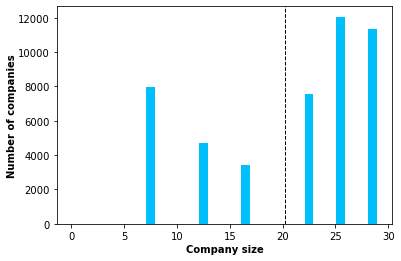

In [31]:
bigCompanyID = dfWorld5Mplot['schoolID'].to_numpy(dtype = int)

noZerosBigCompanyID = bigCompanyID[bigCompanyID != 0]

bigUniqueID, bigCountsUniqueID = np.unique(noZerosBigCompanyID, return_counts = True)

fig, ax = plt.subplots()

(n, bins, patches) = plt.hist(bigCountsUniqueID, bins = range(0, 30), log = False, color = 'deepskyblue', rwidth = 0.8)

plt.axvline(bigCountsUniqueID.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)

ax.set_xlabel('Company size',   labelpad = 3,  weight = 'bold', size = 10)
ax.set_ylabel('Number of companies', labelpad = 1,  weight = 'bold', size = 10)

print('The mean size of the companies is', bigCountsUniqueID.mean(), '\n')

##### Plot Job status by people in the 5M sample

Text(4, 1700000, 'From 31 to 65')

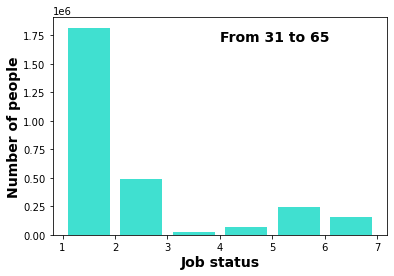

In [32]:
filter = (dfWorld5Mplot['Age'] > 30) & (dfWorld5Mplot['Age'] <= 65)

mybins = (1, 2, 3, 4, 5, 6, 7)
fig, ax = plt.subplots()

myHist = plt.hist(dfWorld5Mplot['JobStatus'].where(filter), rwidth = 0.8, bins = mybins, color = 'turquoise')
ax.set_xlabel('Job status',   labelpad = 3,  weight = 'bold', size = 14)
ax.set_ylabel('Number of people', labelpad = 2,  weight = 'bold', size = 14)

plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))

plt.text(4, 1700000, 'From 31 to 65', weight = 'bold', size = 14)

#fig.savefig('FullJobStatus31-65.pdf')

##### Plots of number of workers vs job positions vs workers in own region in the 5M sample

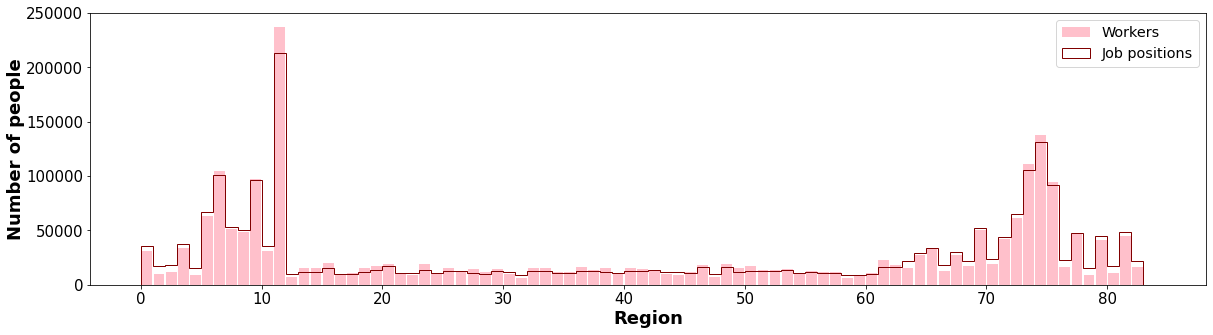

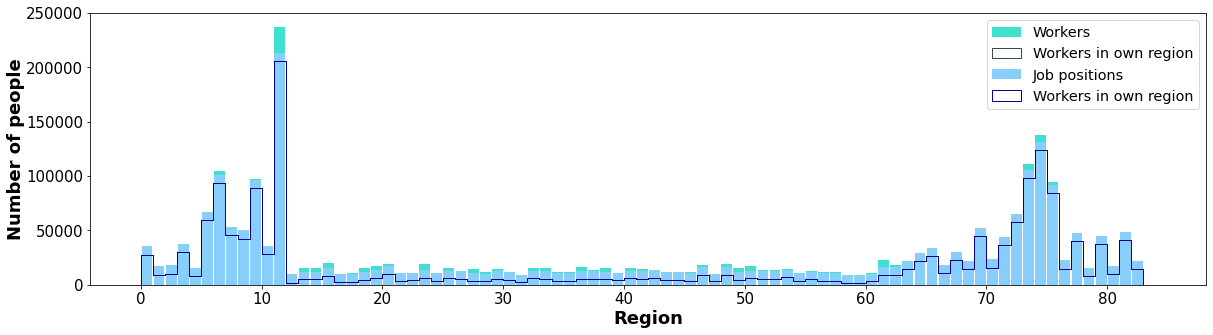

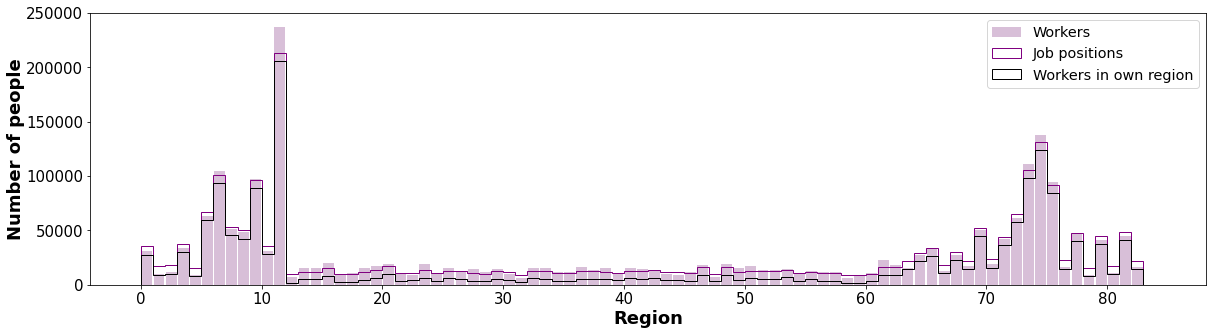

In [33]:
import matplotlib.ticker as ticker

xvalues = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
xlabels = np.array(['0', '10', '20', '30', '40', '50', '60', '70', '80'])


fig, ax = plt.subplots(figsize=(20, 5))

workers   = plt.hist(region5M[workRegion5M != 'Nowhere'], bins = range(0, 85), log = False, color = 'pink', \
                         label = 'Workers', rwidth=0.9)
positions = plt.hist(workRegion5M[workRegion5M != 'Nowhere'], bins = range(0, 85), log = False, color = 'maroon', 
                         histtype='step', label = 'Job positions')

ax.legend(fontsize = 'x-large')
ax.set_ylim([0, 2.5e5]) 
ax.set_xlabel('Region',   labelpad = 3,  weight = 'bold', size = 18)
ax.set_ylabel('Number of people', labelpad = 1,  weight = 'bold', size = 18)
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels, fontsize = 15)
ax.tick_params(axis = 'y', labelsize = 15)
#fig.savefig('workersAndPositions.pdf')


fig, ax = plt.subplots(figsize=(20, 5))

workers  = plt.hist(region5M[workRegion5M != 'Nowhere'], bins = range(0, 85), log = False, color = 'turquoise', \
                        label = 'Workers', rwidth=0.9)
inRegion = plt.hist(region5M[workRegion5M == region5M], bins = range(0, 85), log = False, color = 'darkslategrey', \
                        histtype='step', label = 'Workers in own region')

ax.legend(fontsize = 'x-large')
ax.set_ylim([0, 2.5e5]) 
ax.set_xlabel('Region',   labelpad = 3,  weight = 'bold', size = 18)
ax.set_ylabel('Number of people', labelpad = 1,  weight = 'bold', size = 18)
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels, fontsize = 15)
ax.tick_params(axis = 'y', labelsize = 15)
#fig.savefig('workersAndOwnRegion.pdf')


#fig, ax = plt.subplots(figsize=(20, 5))

inRegion = plt.hist(region5M[workRegion5M == region5M], bins = range(0, 85), log = False, color = 'darkblue', \
                        histtype='step')
positions = plt.hist(workRegion5M[workRegion5M != 'Nowhere'], bins = range(0, 85), log = False, \
                         color = 'lightskyblue', label = 'Job positions', rwidth=0.9)
inRegion = plt.hist(region5M[workRegion5M == region5M], bins = range(0, 85), log = False, color = 'darkblue', \
                        histtype='step', label = 'Workers in own region')

ax.legend(fontsize = 'x-large')
ax.set_ylim([0, 2.5e5]) 
ax.set_xlabel('Region',   labelpad = 3,  weight = 'bold', size = 18)
ax.set_ylabel('Number of people', labelpad = 1,  weight = 'bold', size = 18)
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels, fontsize = 15)
ax.tick_params(axis = 'y', labelsize = 15)
#fig.savefig('PositionsAndOwnRegion.pdf')


fig, ax = plt.subplots(figsize=(20, 5))

workers   = plt.hist(region5M[workRegion5M != 'Nowhere'], bins = range(0, 85), log = False, color = 'thistle', \
                         label = 'Workers', rwidth=0.9)
positions = plt.hist(workRegion5M[workRegion5M != 'Nowhere'], bins = range(0, 85), log = False, color = 'purple', 
                         histtype='step', label = 'Job positions')
inRegion = plt.hist(region5M[workRegion5M == region5M], bins = range(0, 85), log = False, color = 'black', \
                        histtype='step', label = 'Workers in own region')

ax.legend(fontsize = 'x-large')
ax.set_ylim([0, 2.5e5]) 
ax.set_xlabel('Region',   labelpad = 3,  weight = 'bold', size = 18)
ax.set_ylabel('Number of people', labelpad = 1,  weight = 'bold', size = 18)
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels, fontsize = 15)
ax.tick_params(axis = 'y', labelsize = 15)
#fig.savefig('workersPositionsAndOwnRegion.pdf')

##### Plot histogram of number of school children by age in the 5M sample

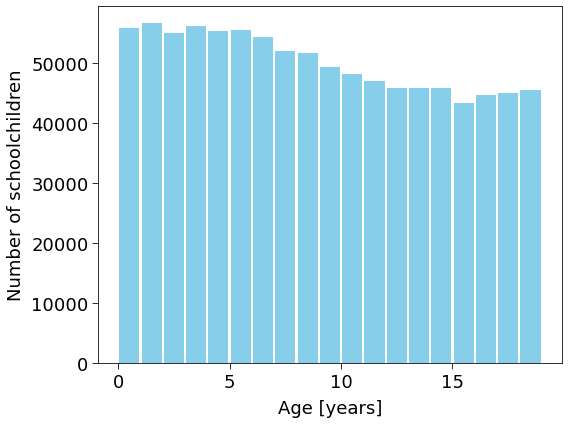

In [34]:
from matplotlib import rcParams 
plt.rcParams['pdf.fonttype'] = 42

fig, ax = plt.subplots(figsize = (8, 6))   

kidsAge = dfWorld5M['Age'].where(dfWorld5M['schoolID']!=0)
kidsAgePlot = plt.hist(kidsAge, color = 'skyblue', bins = range(0, 20), rwidth = 0.9)

ax.set_ylabel("Number of schoolchildren", labelpad = 6, size = 18)
ax.set_xlabel('Age [years]', labelpad = 8, size = 18)
ax.tick_params(axis = 'x', size = 6, labelsize = 18)
ax.tick_params(axis = 'y', size = 6, labelsize = 18)

plt.tight_layout()

#fig.savefig('supleSchoolAge.pdf')

##### Plot histogram of number of seniors in nursing facilities by age in the 5M sample

In [35]:
seniors = dfWorld5M['Age'].where(dfWorld5M['Age'] >= 65) 
seniorsNursing = dfWorld5M['Age'].where(dfWorld5M['HomeID'] < 1000)
seniorsHome = dfWorld5M['Age'].where( (dfWorld5M['Age'] >= 65) & (dfWorld5M['HomeID'] > 1000) ) 

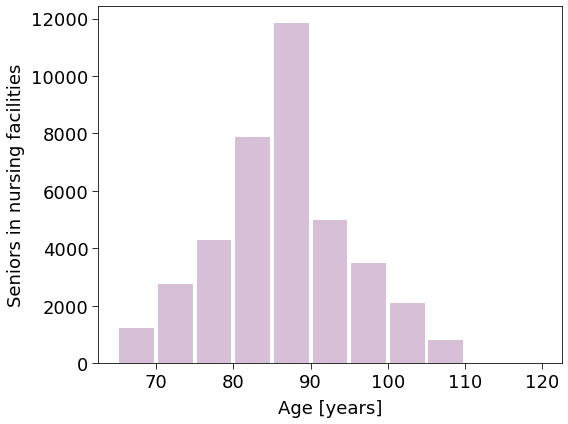

In [36]:
from matplotlib import rcParams 
plt.rcParams['pdf.fonttype'] = 42

fig, ax = plt.subplots(figsize = (8, 6))   

mybins = (65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120)

nursingPlot = plt.hist(seniorsNursing, color = 'thistle', bins = mybins, rwidth = 0.9)

ax.set_ylabel("Seniors in nursing facilities", labelpad = 6, size = 18)
ax.set_xlabel('Age [years]', labelpad = 8, size = 18)
ax.tick_params(axis = 'x', size = 6, labelsize = 18)
ax.tick_params(axis = 'y', size = 6, labelsize = 18)

plt.tight_layout()

#fig.savefig('supleSeniorsNursingAge.pdf')

##### Plot histogram of seniors in family dwellings by age in the 5M sample

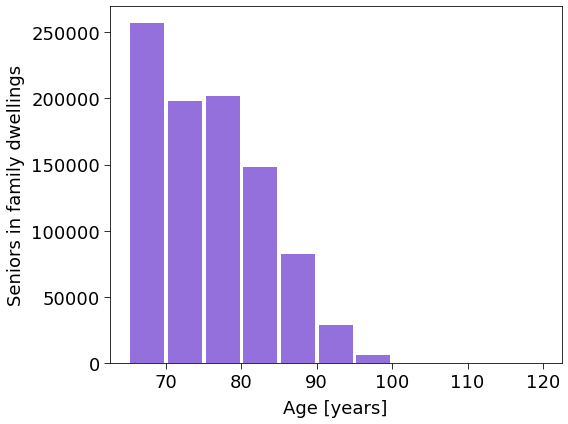

In [37]:
from matplotlib import rcParams 
plt.rcParams['pdf.fonttype'] = 42

fig, ax = plt.subplots(figsize = (8, 6))   

mybins = (65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120)

seniorsHomePlot = plt.hist(seniorsHome, color = 'mediumpurple', bins = mybins, rwidth = 0.9)

ax.set_ylabel("Seniors in family dwellings", labelpad = 6, size = 18)
ax.set_xlabel('Age [years]', labelpad = 8, size = 18)
ax.tick_params(axis = 'x', size = 6, labelsize = 18)
ax.tick_params(axis = 'y', size = 6, labelsize = 18)

plt.tight_layout()

#fig.savefig('supleSeniorsHomeAge.pdf')

##### Plot histogram of number of seniors in nursing facilities by age vs seniors in family dwellings by age in the 5M sample

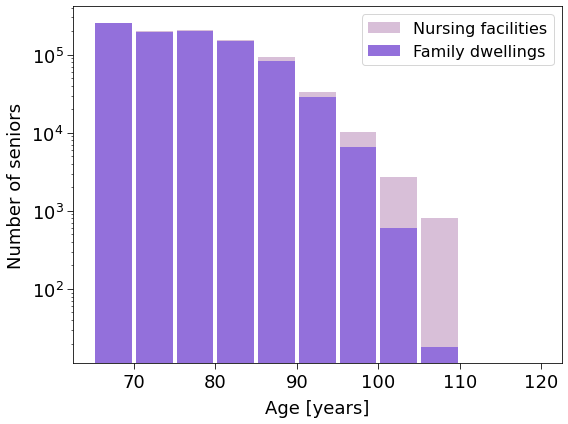

In [38]:
from matplotlib import rcParams
plt.rcParams['pdf.fonttype'] = 42

fig, ax = plt.subplots(figsize = (8, 6))   

mybins = (65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120)

allSeniorsPlot  = plt.hist(seniors,     color = 'thistle',      bins = mybins, rwidth = 0.9, label = 'Nursing facilities')
seniorsHomePlot = plt.hist(seniorsHome, color = 'mediumpurple', bins = mybins, rwidth = 0.9, label = 'Family dwellings')

leg = plt.legend(fontsize = 16,loc = 'upper right')

ax.set_yscale('log')

ax.set_ylabel("Number of seniors", labelpad = 6, size = 18)
ax.set_xlabel('Age [years]', labelpad = 8, size = 18)
ax.tick_params(axis = 'x', size = 6, labelsize = 18)
ax.tick_params(axis = 'y', size = 6, labelsize = 18)

plt.tight_layout()

#fig.savefig('supleSeniorsAge.pdf')

##### Plot histogram of number of persons in the original 400k sample by number of factor

Text(0.5, 1.0, 'Original 400k sample')

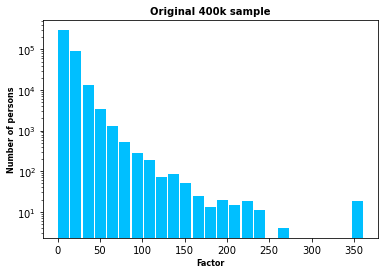

In [39]:
fig, ax = plt.subplots()

factor400kHist = plt.hist(factor400k, color = 'deepskyblue', bins = 25, log = True, rwidth=0.9)
ax.set_xlabel('Factor',   labelpad = 3,  weight ='bold', size = 8)
ax.set_ylabel('Number of persons', labelpad = 1,  weight = 'bold', size = 8)
ax.set_title('Original 400k sample', weight = 'bold', size = 10)
#fig.savefig('factor400k.pdf')

##### Plot histograms of age distributions of original 400k sample vs simulated 5M sample

Text(0.5, 1.0, 'Simulated 5M sample')

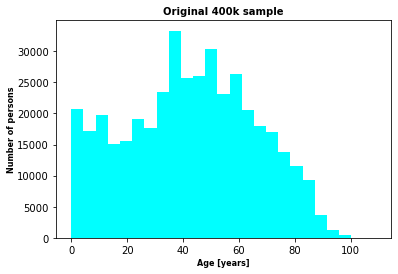

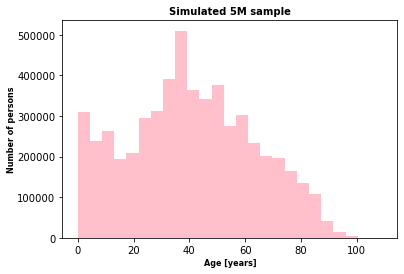

In [40]:
fig, ax = plt.subplots()

age400kHist = plt.hist(age400k, color = 'cyan', bins = 25)
ax.set_xlabel('Age [years]',   labelpad = 3,  weight ='bold', size = 8)
ax.set_ylabel('Number of persons', labelpad = 1,  weight = 'bold', size = 8)
ax.set_title('Original 400k sample', weight = 'bold', size = 10)
#fig.savefig('age400k.pdf')

fig, ax = plt.subplots()

age5MHist = plt.hist(age5M, color = 'pink', bins = 25)
ax.set_xlabel('Age [years]',   labelpad = 3,  weight = 'bold', size = 8)
ax.set_ylabel('Number of persons', labelpad = 1,  weight = 'bold', size = 8)
ax.set_title('Simulated 5M sample', weight = 'bold', size = 10)
#fig.savefig('age5M.pdf')

##### Compare age distributions of original 400k sample vs simulated 5M sample

Text(0, 0.5, 'Number of persons')

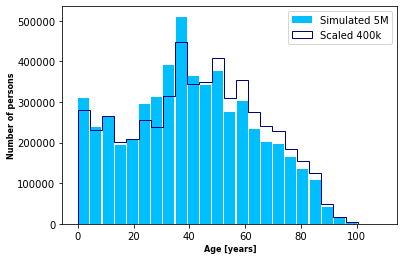

In [41]:
fig, ax = plt.subplots()

age5MHist = plt.hist(age5M, color = 'deepskyblue', bins = 25, rwidth=0.9, linewidth = 2, label = "Simulated 5M")

age400kScaledHist = plt.hist(age400k, color = 'navy', bins = 25, label = "Scaled 400k", histtype='step', \
                             weights = numPeople5M / numPeople400k * np.ones_like(age400k))



ax.legend()
ax.set_xlabel('Age [years]',   labelpad = 3,  weight = 'bold', size = 8)
ax.set_ylabel('Number of persons', labelpad = 1,  weight = 'bold', size = 8)
#fig.savefig('ageWeightComparison.pdf')

##### Plot histograms of number of persons in the original 400k sample and the simulated 5M sample by HomeID

Text(0.5, 1.0, 'Simulated 5M sample')

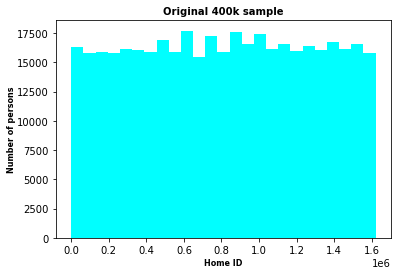

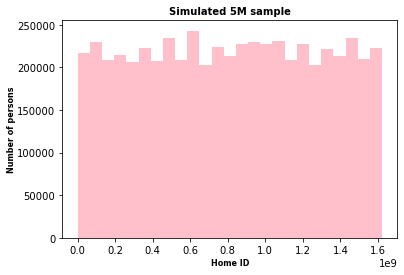

In [42]:
fig, ax = plt.subplots()

homeID400kHist = plt.hist(homeID400k, color = 'cyan', bins = 25)
ax.set_xlabel('Home ID',   labelpad = 3,  weight ='bold', size = 8)
ax.set_ylabel('Number of persons', labelpad = 1,  weight = 'bold', size = 8)
ax.set_title('Original 400k sample', weight = 'bold', size = 10)
#fig.savefig('homeID400k.pdf')

fig, ax = plt.subplots()

homeID5MHist = plt.hist(homeID5M, color = 'pink', bins = 25)
ax.set_xlabel('Home ID',   labelpad = 3,  weight = 'bold', size = 8)
ax.set_ylabel('Number of persons', labelpad = 1,  weight = 'bold', size = 8)
ax.set_title('Simulated 5M sample', weight = 'bold', size = 10)
#fig.savefig('homeID5M.pdf')

##### Plot histograms of number of persons in the original 400k sample and the simulated 5M sample by Job Status

Text(0.5, 1.0, 'Simulated 5M sample')

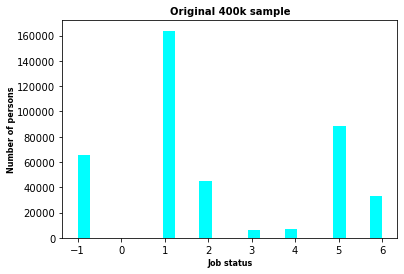

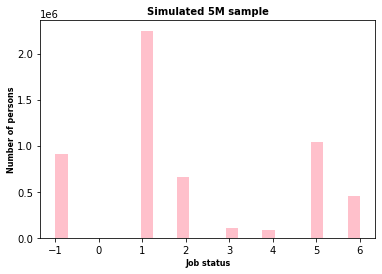

In [43]:
fig, ax = plt.subplots()

jobStatusID400kHist = plt.hist(jobStatus400k, color = 'cyan', bins = 25)
ax.set_xlabel('Job status',   labelpad = 3,  weight ='bold', size = 8)
ax.set_ylabel('Number of persons', labelpad = 1,  weight = 'bold', size = 8)
ax.set_title('Original 400k sample', weight = 'bold', size = 10)
#fig.savefig('jobStatus400k.pdf')

fig, ax = plt.subplots()

jobStatusID5MHist = plt.hist(jobStatus5M, color = 'pink', bins = 25)
ax.set_xlabel('Job status',   labelpad = 3,  weight = 'bold', size = 8)
ax.set_ylabel('Number of persons', labelpad = 1,  weight = 'bold', size = 8)
ax.set_title('Simulated 5M sample', weight = 'bold', size = 10)
#fig.savefig('jobStatus5M.pdf')

##### Plot histogram of the number of companies in the simulated 5M sample by Company ID  -->

Text(0.5, 1.0, 'Simulated 5M sample')

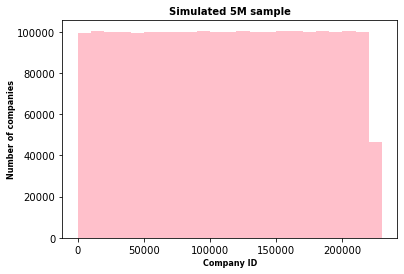

In [44]:
fig, ax = plt.subplots()

mybins = (1, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, \
          130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000)

companyIDHist = plt.hist(companyID, color = 'pink', bins = mybins)
ax.set_xlabel('Company ID',   labelpad = 3,  weight = 'bold', size = 8)
ax.set_ylabel('Number of companies', labelpad = 1,  weight = 'bold', size = 8)
ax.set_title('Simulated 5M sample', weight = 'bold', size = 10)
#fig.savefig('companyID.pdf')

##### Plot histogram of number of people by Region in the simulated 5M sample

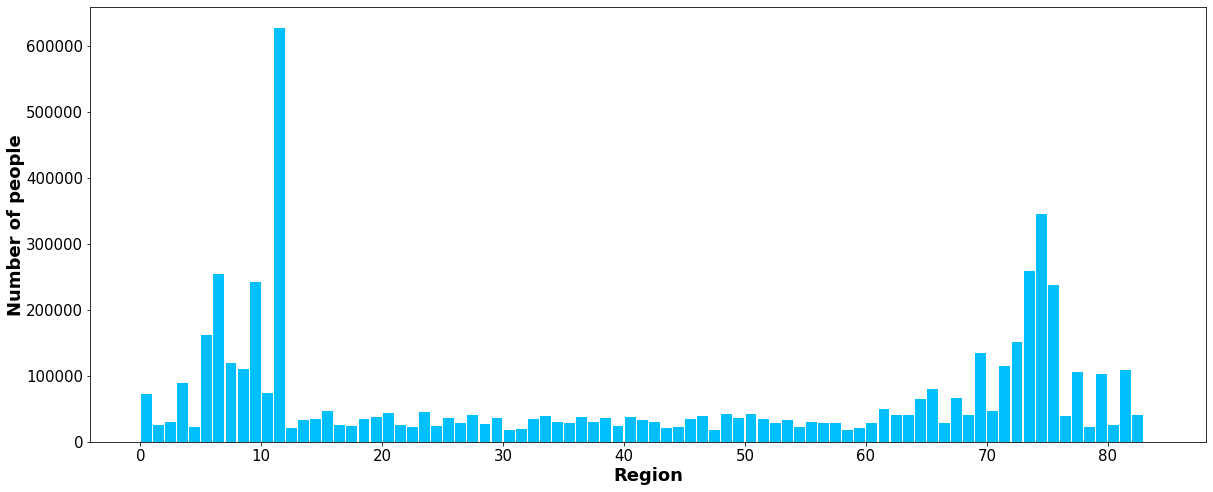

In [45]:
import matplotlib.ticker as ticker

xvalues = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
xlabels = np.array(['0', '10', '20', '30', '40', '50', '60', '70', '80'])


fig, ax = plt.subplots(figsize=(20, 8))

#schoolers  = plt.hist(region5M[schoolRegion5M != 'Nowhere'], bins = range(0, 85), log = False, color = 'deepskyblue', \
#                    label = 'Kids', rwidth=0.9)

people  = plt.hist(region5M, bins = range(0, 85), log = False, color = 'deepskyblue', \
                    label = 'People', rwidth=0.9)

#ax.legend(fontsize = 'x-large')
#ax.set_ylim([0, 2.5e5]) 
ax.set_xlabel('Region',   labelpad = 3,  weight = 'bold', size = 18)
ax.set_ylabel('Number of people', labelpad = 1,  weight = 'bold', size = 18)
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels, fontsize = 15)
ax.tick_params(axis='y', labelsize = 15)

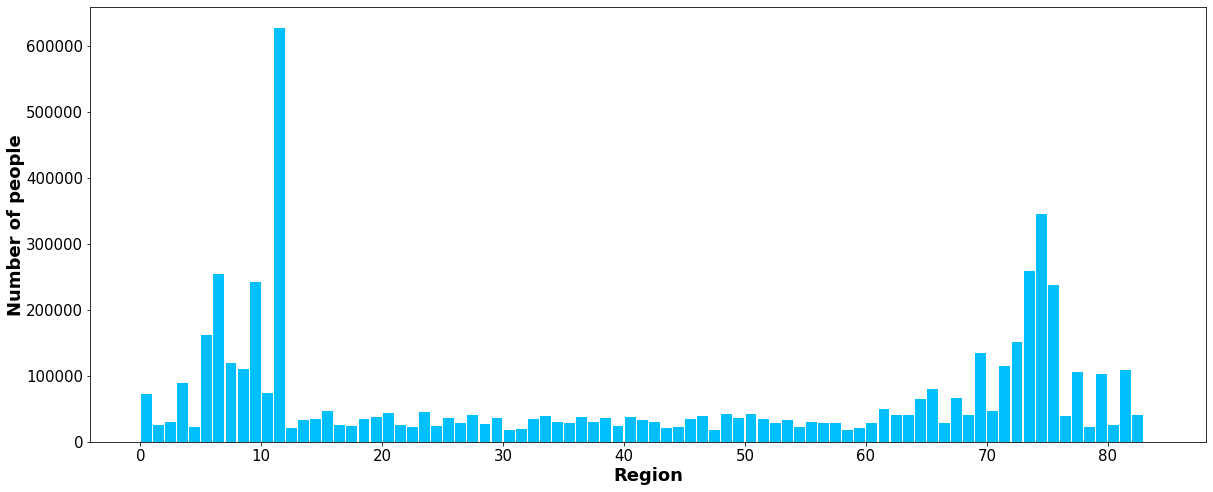

In [46]:
import matplotlib.ticker as ticker

xvalues = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
xlabels = np.array(['0', '10', '20', '30', '40', '50', '60', '70', '80'])


fig, ax = plt.subplots(figsize=(20, 8))

#schoolers  = plt.hist(region5M[schoolRegion5M != 'Nowhere'], bins = range(0, 85), log = False, color = 'deepskyblue', \
#                    label = 'Kids', rwidth=0.9)

people  = plt.hist(region5M, bins = range(0, 85), log = False, color = 'deepskyblue', \
                    label = 'People', rwidth=0.9)

#ax.legend(fontsize = 'x-large')
#ax.set_ylim([0, 2.5e5]) 
ax.set_xlabel('Region',   labelpad = 3,  weight = 'bold', size = 18)
ax.set_ylabel('Number of people', labelpad = 1,  weight = 'bold', size = 18)
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels, fontsize = 15)
ax.tick_params(axis='y', labelsize = 15)

##### Plot histogram of time to school 

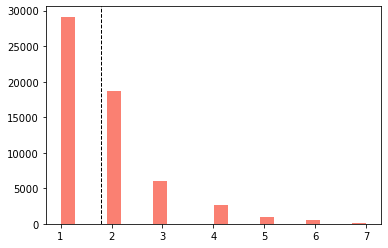

In [47]:
field = 'TDESP'
filter = (dfC2011OldData['EDAD'] <= 18) & (dfC2011OldData['RELA'] != 1) & (dfC2011OldData['LTRABA'] != 1)
myVariable = dfC2011OldData[field].where(filter).dropna().to_numpy()

nbins = 20

fig, ax = plt.subplots()
myplot = plt.hist(myVariable, color = 'salmon', bins = nbins, rwidth=0.9) 
plt.axvline(myVariable.mean(), color='k', linestyle='dashed', linewidth=1)

##### Plot histogram of number of people by home occupancy in the simulated 5M sample

Text(0.5, 1.0, 'Simulated 5M sample')

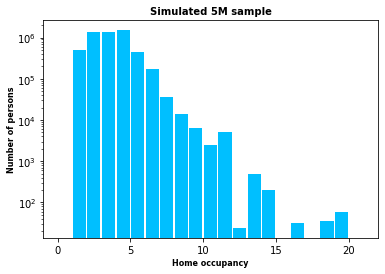

In [48]:
fig, ax = plt.subplots()

homeOccupancyHist = plt.hist(homeOccupancy5M, color = 'deepskyblue', bins = range(0, 22), log = True, rwidth=0.9)
ax.set_xlabel('Home occupancy',   labelpad = 3,  weight = 'bold', size = 8)
ax.set_ylabel('Number of persons', labelpad = 1,  weight = 'bold', size = 8)
ax.set_title('Simulated 5M sample', weight = 'bold', size = 10)

##### Plot histogram of number of people by Region (by workers, workplaces and workers in own region) in the simulated 5M sample 

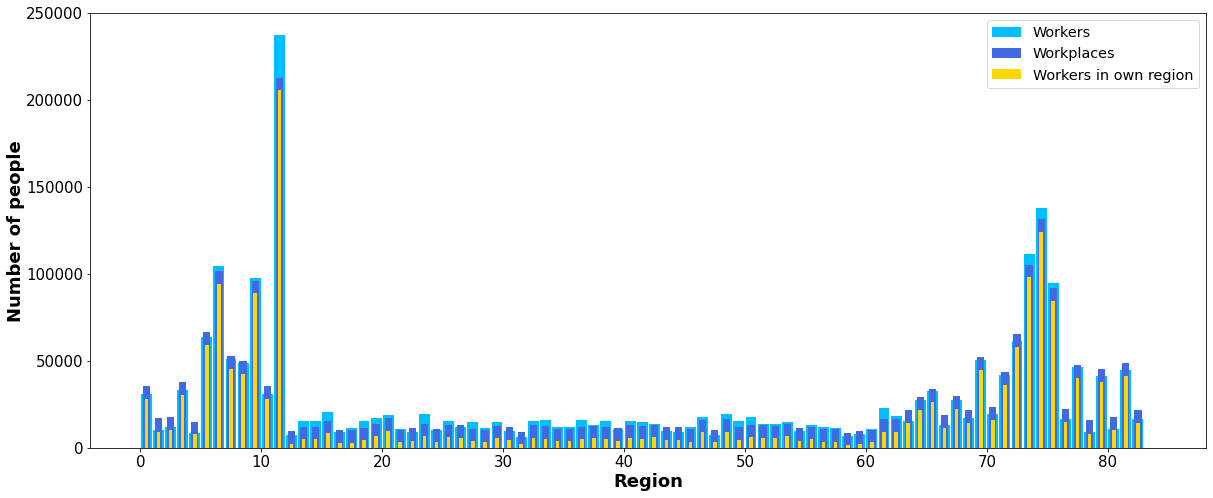

In [49]:
fig, ax = plt.subplots(figsize=(20, 8))

xvalues = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
xlabels = np.array(['0', '10', '20', '30', '40', '50', '60', '70', '80'])

workers   = plt.hist(region5M[workRegion5M != 'Nowhere'], bins = range(0, 85), log = False, color = 'deepskyblue', \
                     label = 'Workers', rwidth = 0.9)
positions = plt.hist(workRegion5M[workRegion5M != 'Nowhere'], bins = range(0, 85), log = False, color = 'royalblue', 
                     histtype='barstacked', label = 'Workplaces', rwidth = 0.6)
inRegion = plt.hist(region5M[workRegion5M == region5M], bins = range(0, 85), log = False, color = 'gold', \
                    histtype='barstacked', label = 'Workers in own region', rwidth = 0.3)

ax.legend(fontsize = 'x-large')
ax.set_ylim([0, 2.5e5]) 
ax.set_xlabel('Region',   labelpad = 3,  weight = 'bold', size = 18)
ax.set_ylabel('Number of people', labelpad = 1,  weight = 'bold', size = 18)
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels, fontsize = 15)
ax.tick_params(axis='y', labelsize = 15)
#fig.savefig('workersPositionsAndOwnRegion.pdf')